  ### **Natural Language Processing**

###   **Assignment_1**
**Rania Hassan**

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import nltk
import re
import codecs

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
import urllib
import bs4 as bs
import re

from gensim.models import Word2Vec


import spacy
sp = spacy.load('en_core_web_sm')

In [2]:
#text from b data
text = '''I should not obtrude my affairs so much on the notice of my readers if\
very particular inquiries had not been made by my townsmen concerning\
my mode of life, which some would call impertinent, though they do not\
appear to me at all impertinent, but, considering the circumstances,\
very natural and pertinent. Some have asked what I got to eat; if I did
not feel lonesome; if I was not afraid; and the like. Others have been\
curious to learn what portion of my income I devoted to charitable\
purposes; and some, who have large families, how many poor children \I
maintained. I will therefore ask those of my readers who feel no\
particular interest in me to pardon me if I undertake to answer some of\
these questions in this book. In most books, the _I_, or first person,\
is omitted; in this it will be retained; that, in respect to egotism,\
is the main difference. We commonly do not remember that it is, after\
all, always the first person that is speaking. I should not talk so\
much about myself if there were anybody else whom I knew as well.\
Unfortunately, I am confined to this theme by the narrowness of my\
experience. Moreover, I, on my side, require of every writer, first or\
last, a simple and sincere account of his own life, and not merely what\
he has heard of other men’s lives; some such account as he would send\
to his kindred from a distant land; for if he has lived sincerely, it\
must have been in a distant land to me. Perhaps these pages are more\
particularly addressed to poor students. As for the rest of my readers\,
they will accept such portions as apply to them. I trust that none will\
stretch the seams in putting on the coat, for it may do good service to\
him whom it fits.'''

In [3]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace all consecutive figures within square brackets
text = re.sub(r'\s+',' ',text) # remove two or more whitespaces with a single whitespace
text = text.lower() # convert all text to loser cases

text = re.sub(r'\d',' ',text) # replace single digits with space
text = re.sub(r'\s+',' ',text) 

### Tokenization

We need to preprocess this text by tokenize the text.

In [4]:
import re
from string import punctuation 

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    '''create a map between tokens and indices'''
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word


In [5]:
#we will create tokens using the text shown above. The returned object will be a list containing all the tokens in text.
tokens = tokenize(text)


In [6]:
#create a map between tokens and indices, and vice versa
word_to_idex, idex_to_word = mapping(tokens)
word_to_idex

{'anybody': 0,
 'the': 1,
 'unfortunately': 2,
 'inquiries': 3,
 'as': 4,
 'that': 5,
 'main': 6,
 'portions': 7,
 'ask': 8,
 '_i_': 9,
 'many': 10,
 'but': 11,
 'me': 12,
 'townsmen': 13,
 'land': 14,
 'so': 15,
 'sendto': 16,
 'mode': 17,
 'other': 18,
 'always': 19,
 'none': 20,
 'tohim': 21,
 'am': 22,
 'others': 23,
 'his': 24,
 'are': 25,
 'of': 26,
 'though': 27,
 'ofthese': 28,
 'speaking': 29,
 'pages': 30,
 'distant': 31,
 'who': 32,
 'he': 33,
 'book': 34,
 'has': 35,
 'portion': 36,
 'feel': 37,
 'men': 38,
 'well': 39,
 'account': 40,
 'poor': 41,
 'putting': 42,
 'it': 43,
 'considering': 44,
 'learn': 45,
 'such': 46,
 'a': 47,
 'from': 48,
 'in': 49,
 'ifvery': 50,
 'by': 51,
 'afterall': 52,
 'if': 53,
 'accept': 54,
 'pardon': 55,
 'affairs': 56,
 'lived': 57,
 'myself': 58,
 'may': 59,
 'myexperience': 60,
 'all': 61,
 'omitted': 62,
 'call': 63,
 'not': 64,
 'is': 65,
 'every': 66,
 'them': 67,
 'have': 68,
 'confined': 69,
 'they': 70,
 'moreparticularly': 71,
 're

As we can see, the lookup table is a dictionary object containing the relationship between words and ids. Note that each entry in this lookup table is a token created using the tokenize() function we defined earlier.

### Generate training Data

We basically iterate over the tokenized data and generate pairs. One technicality here is that, for the first and last few tokens, it may not be possible to obtain words to the left or right of that input token.

In [7]:
np.random.seed(42)


def generate_training_data(tokens, word_to_idex, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_idex[tokens[i]], len(word_to_idex)))
            y.append(one_hot_encode(word_to_idex[tokens[j]], len(word_to_idex)))
    
    return np.asarray(X), np.asarray(y)





In [8]:
#this is the definition for concat, an auxiliary function we used above to combine two range() objects.
def concat(*iterables):
    for iterable in iterables:
        yield from iterable




In [9]:
# this code we use to one-hot vectorize tokens
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [10]:
#generate some training data with a window size of two.
X, y = generate_training_data(tokens, word_to_idex, 2)

In [11]:
X.shape

(1202, 179)

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y.shape

(1202, 179)

Both X and y are matrices with 1202 rows and 179 columns. Here, 1202 is the number of training examples we have. We would expect this number to have been larger had we used a larger window. 179 is the size of our corpus, or the number of unique tokens we have in the original text. Since we have one-hot encoded both the input and output as 179-dimensional sparse vectors, this is expected.

Now, we are finally ready to build and train our embedding network.

### Initialize of parameters

In [14]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [15]:
#specify our model to create ten-dimensional embeddings.
model = init_network(len(word_to_idex), 10)


### Forward Propagation

In [16]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    
    return cache

In [17]:
# check the dimensionality of the matrices
(X @ model["w1"]).shape

(1202, 10)

In [18]:
# check the dimensionality after passing through the second layer
(X @ model["w1"] @ model["w2"]).shape

(1202, 179)

This is expected, since we want all the 1202 tokens in the text to be converted into ten-dimensional vectors.

### Backpropagation

In [19]:
#implement backpropagation
def backward(model, X, y, alpha):
    
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    
    return cross_entropy(cache["z"], y)

In [20]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

### training the model

<ipython-input-21-33b221ecf5fc>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


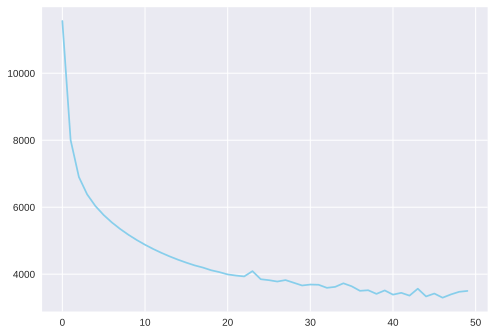

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
n_iter = 50
learning_rate = 0.03

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

An obvious sanity check we can perform is to see which token our model predicts given the word “afraid” If the model was trained properly, the most likely word should understandably be “machine.” And indeed, when that is the result we get: notice that “machine” is at the top of the list of tokens, sorted by degree of affinity with “afraid”

afraid= one_hot_enco

In [22]:
afraid = one_hot_encode(word_to_idex["afraid"], len(word_to_idex))
result = forward(model, [afraid], return_cache=False)[0]

for word in (idex_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

and
the
i
by
made
was
not
be
it
been
retained
to
commonly
that
remember
in
noparticular
feel
trust
main
speaking
myexperience
we
charitablepurposes
may
obtrude
life
interest
did
whathe
itmust
have
willstretch
egotism
lonesome
who
should
they
had
afraid
rest
he
person
merely
circumstances
putting
concerningmy
natural
those
sincerely
notice
do
income
of
talk
townsmen
very
my
will
readers
on
first
afterall
seams
omitted
book
difference
this
theme
none
respect
inquiries
orlast
ask
a
others
sincere
land
these
always
is
therefore
moreparticularly
maintained
pertinent
ofthese
pages
considering
kindred
so
his
good
ifvery
coat
books
affairs
distant
somuch
from
like
tohim
are
much
service
all
notappear
has
impertinent
simple
large
lived
narrowness
questions
eat
addressed
require
side
them
fits
heard
call
pardon
but
perhaps
got
accept
such
undertake
particular
about
devoted
asked
would
am
poor
though
lives
confined
myself
own
families
students
s
some
for
which
at
men
other
_i_
knew
portion
apply


### **Embedding**
**visualization**

the key behind word embeddings is that the rows of the first weight matrix is effectively a dense representation of one-hot encoded vectors each corresponding to various tokens in the text dataset.

In [23]:
model["w1"]

array([[-0.64252171, -0.82318218, -0.3529493 , ..., -0.76647291,
        -0.26889557, -1.5722059 ],
       [ 0.21219774,  1.01040352, -0.71617289, ...,  0.40173589,
        -0.23059587, -0.23310938],
       [ 1.35556597,  0.45334   ,  0.16105257, ..., -0.88858617,
        -1.17905187, -1.35598196],
       ...,
       [ 1.8237689 ,  0.16056122,  0.22955221, ..., -1.1774529 ,
        -0.72408916,  0.01729107],
       [-0.15870184,  1.41588175, -0.01204958, ...,  1.37379769,
        -0.27624316, -0.11664761],
       [ 1.17642631, -0.26995112, -0.59179588, ...,  0.05340231,
         1.82751976, -0.98884171]])

In [24]:
#function that implements this feature.
def get_embedding(model, text):
    try:
        idx = word_to_idex["afraid"]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_idex))
    return forward(model, one_hot)["a1"]

In [25]:
get_embedding(model, text)

array([ 0.91837232,  0.11597643,  1.29234447,  0.11364274,  1.26877782,
       -0.19687659,  0.69014564,  1.32281976,  0.47540075,  2.06093858])

A this vector is not a collection of some randomly initialized numbers, but a result of training with context data generated through the sliding window algorithm described above. In other words, these vectors encode meaningful semantic information that tells us which words tend to go along with each other.

### **Second method for embedding**
### **Clustering**

In [26]:
def lemmatizer(sentence):
    spacy_sentence = sp(sentence)
    tokens = []
    for word in spacy_sentence:
        tokens.append(word.lemma_)
        
    return tokens

In [27]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace all consecutive figures within square brackets
text = re.sub(r'\s+',' ',text) # remove two or more whitespaces with a single whitespace
text = text.lower() # convert all text to loser cases

text = re.sub(r'\d',' ',text) # replace single digits with space
text = re.sub(r'\s+',' ',text) 

In [40]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def remove_punct(text):
  Text="".join([char for char in text if char not in string.punctuation])
  return  Text
  

In [46]:
# print first 200 characters
text[:200]

'i should not obtrude my affairs so much on the notice of my readers ifvery particular inquiries had not been made by my townsmen concerningmy mode of life, which some would call impertinent, though th'

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# check first few sentences
import spacy
sp = spacy.load('en_core_web_sm')
sentences = nltk.sent_tokenize(text)
sentences = [lemmatizer(sentence.strip()) for sentence in sentences]

In [31]:
# Training the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print ("# of words", len(model.wv.key_to_index))

# of words 167


In [32]:
sims = model.wv.most_similar('afraid', topn=5)  # get other similar words
print(sims)

[('myexperience', 0.28751450777053833), ('maintain', 0.27797171473503113), (';', 0.24314457178115845), ('and', 0.22955992817878723), ('fit', 0.21712331473827362)]


In [33]:
vector = model.wv['afraid']

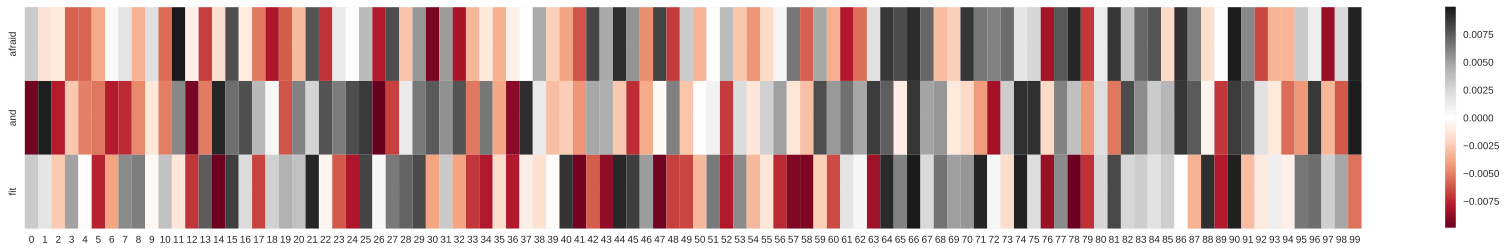

In [34]:
vector = model.wv['and']  # get numpy vector of a word
plt.figure(figsize=(30,4))
df = pd.DataFrame({'afraid': model.wv['afraid'],
                   'and': model.wv['and'],
                   'fit': model.wv['fit']
                  })
sns.heatmap(df.T, fmt="g", cmap='RdGy')
plt.show()

we have a fairly high similarity between fit and "and",and fit and afraid.